In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.dates as mdates

uscoviddata = pd.read_csv('dailyus.csv')

juststates = uscoviddata.drop(['date', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'], axis=1)

justdates = uscoviddata.drop(['state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'], axis=1)

justpositive = uscoviddata.drop(['date', 'state', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'], axis=1)
#Below is a list that just has the state, date, and total positive cases.
#It is not useful in its current state
sdc = pd.concat([juststates,justdates,justpositive],axis=1)
#By setting the state code to be the indeces for the other columns we can do some easy stuff that gets rid of the rest of the cases to focus on one.
st_date_pos = sdc.set_index('state')

def data_for_state(statecode, df):
       data_ind = df.index == statecode
       new_df = df[data_ind]
       return new_df

def all_state(df):
       """the purpose of this code is to just prepare all the data for if you want to see it.
          It returns "states" which is just the list of state codes in the order that it appears in
          "df_states", which is a list of all the data frames that have dates and the number of
          total positive cases up to that date.
       """
       st_og = df.index.to_list()
       #next line removes duplicates from list
       states = list(set(st_og))
       df_states=[]
       all_data=[]
       for i in range(len(states)):
              df_states += [data_for_state(states[i], df)]
       return states, df_states

seperated_data = all_state(st_date_pos)
states = seperated_data[0]
df_states = seperated_data[1]
def plotcase(df):
       df['date'] = df['date'].apply(str)
       dates = df.date.to_list()
       cases = df.positive.to_list()
       cdates = dates[::-1]
       ccases = cases[::-1]
       
       plt.figure(figsize = (15,7))
       plt.xticks(rotation = 90)
       plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
       plt.plot(cdates, ccases)
       plt.title('COVID19 Cases Over Time')
       plt.show()

def plottable(df):
       df['date'] = df['date'].apply(str)
       dates = df.date.to_list()
       cases = df.positive.to_list()
       #cdates = dates[::-1]
       #ccases = cases[::-1]
       return dates, cases


def plot_two(statecode1, statecode2, df):
       s1data = data_for_state(statecode1, df)
       s2data = data_for_state(statecode2, df)

       s1datecase=plottable(s1data)
       s2datecase=plottable(s2data)

       s1date=s1datecase[0]
       s1case=s1datecase[1]
       s2date=s2datecase[0]
       s2case=s2datecase[1]

       if len(s1date) < len(s2date):
              ruler = len(s2date) - len(s1date)
              to_add = len(s2date) - ruler
              s1date+=s2date[to_add:]
              for i in range(0, ruler):
                     s1case+=[0]
       else:
              ruler = len(s1date) - len(s2date)
              to_add = len(s1date) - ruler
              s2date+=s1date[to_add:]
              for i in range(0, ruler):
                     s2case+=[0]

       s1date=s1date[::-1]
       s1case=s1case[::-1]

       s2date=s2date[::-1]
       s2case=s2case[::-1]

       plt.figure(figsize = (15,7))
       plt.xticks(rotation = 90)
       plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
       plt.plot(s1date, s1case, label = statecode1)
       plt.plot(s2date, s2case, label = statecode2)
       plt.legend()
       plt.title('COVID19 Cases Over Time')
       plt.show()

def plot_many(stateL, df):
       plt.figure(figsize = (15,7))
       plt.xticks(rotation = 90)
       plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

       #got the data for WA because it has the most dates

       WA = data_for_state('WA', df)

       WA2 = plottable(WA)
       WAcase = WA2[1]
       WAdate = WA2[0]



       for i in range(len(stateL)):
              sdata = data_for_state(stateL[i], df)
              sdatecase = plottable(sdata)

              statecode = stateL[i]

              sdate = sdatecase[0]
              scase = sdatecase[1]
              #this process is used to make all the states have the same amount of cases
              ruler = len(WAdate) - len(sdate)
              to_add = len(WAdate) - ruler
              sdate+=WAdate[to_add:]
              #I figured that if the state didn't have any data for positive cases in those dates where nothing was reported, they would be zeros
              for i in range(0, ruler):
                     scase+=[0]

              #I reverse the dates and cases so that they go in chronological order
              #also, at this point, if you want to normalize the data or scale it or do anything, you can.
              #for example, you can log every entry in scase, however you must recognize that a lot of these case values are zero, so make sure to clean
              #that up however you want.

              udate = sdate[::-1]
              ucase = scase[::-1]

              plt.plot(udate, ucase, label = statecode)

       plt.legend()
       plt.title('COVID19 Cases Over Time')
       plt.show()

def plot_many(stateL, df):
       plt.figure(figsize = (15,7))
       plt.xticks(rotation = 90)
       plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

       WA = data_for_state('WA', df)
       WA2 = plottable(WA)
       WAcase = WA2[1]
       WAdate = WA2[0]
       for i in range(len(stateL)):
              sdata = data_for_state(stateL[i], df)
              sdatecase = plottable(sdata)
              statecode = stateL[i]
              sdate = sdatecase[0]
              scase = sdatecase[1]
              ruler = len(WAdate) - len(sdate)
              to_add = len(WAdate) - ruler
              sdate+=WAdate[to_add:]
              for i in range(0, ruler):
                     scase+=[0]
              udate = sdate[::-1]
              ucase = scase[::-1]

              plt.plot(udate, ucase, label = statecode)

       plt.legend()
       plt.title('COVID19 Cases Over Time')
       plt.show()






/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

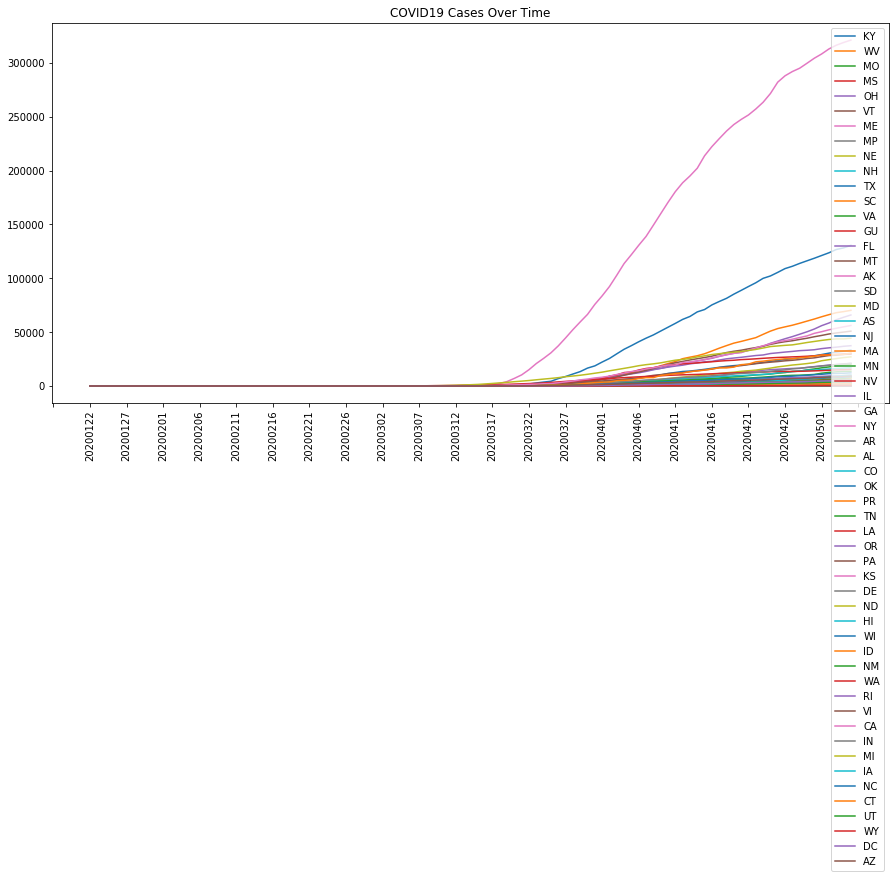

In [91]:
plot_many(states, st_date_pos)

In [92]:
def scatter_many_derivative(stateL, df):
       plt.figure(figsize = (15,7))
       plt.xticks(rotation = 90)
       plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

       WA = data_for_state('WA', df)
       WA2 = plottable(WA)
       WAcase = WA2[1]
       WAdate = WA2[0]
       for i in range(len(stateL)):
              sdata = data_for_state(stateL[i], df)
              sdatecase = plottable(sdata)
              statecode = stateL[i]
              sdate = sdatecase[0]
              scase = sdatecase[1]
              ruler = len(WAdate) - len(sdate)
              to_add = len(WAdate) - ruler
              sdate+=WAdate[to_add:]
              for i in range(0, ruler):
                     scase+=[0]
              udate = sdate[::-1]
              ucase = scase[::-1]

              xudate = range(len(udate))

              data = {
                     'x': xudate,
                     'y': ucase
              }

              data['y_p'] = np.diff(data['y']) / np.diff(data['x'])
              data['x_p'] = (np.array(data['x'])[:-1] + np.array(data['x'])[1:]) / 2

              plt.scatter(udate[1:], data['y_p'], label = statecode)

       plt.legend()
       plt.title('COVID19 Case Rate Over Time')
       plt.show()



def max_rate_date(stateL, df):
       max_rate = 0
       daterateD = {}

       WA = data_for_state('WA', df)
       WA2 = plottable(WA)
       WAcase = WA2[1]
       WAdate = WA2[0]
       for i in range(len(stateL)):
              sdata = data_for_state(stateL[i], df)
              sdatecase = plottable(sdata)
              statecode = stateL[i]
              sdate = sdatecase[0]
              scase = sdatecase[1]
              ruler = len(WAdate) - len(sdate)
              to_add = len(WAdate) - ruler
              sdate+=WAdate[to_add:]
              for i in range(0, ruler):
                     scase+=[0]
              udate = sdate[::-1]
              ucase = scase[::-1]

              xudate = range(len(udate))

              data = {
                     'x': xudate,
                     'y': ucase
              }

              data['y_p'] = np.diff(data['y']) / np.diff(data['x'])
              data['x_p'] = (np.array(data['x'])[:-1] + np.array(data['x'])[1:]) / 2

              maxrate = max(data['y_p'])
              indmax = np.argmax(data['y_p'])
              maxdate = udate[indmax]

              daterateD[statecode] = maxdate, maxrate

       return daterateD

In [93]:
max_rate_date(states, st_date_pos)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'KY': ('20200409', 347.0),
 'WV': ('20200418', 78.0),
 'MO': ('20200503', 368.0),
 'MS': ('20200430', 397.0),
 'OH': ('20200418', 1380.0),
 'VT': ('20200403', 72.0),
 'ME': ('20200412', 65.0),
 'MP': ('20200331', 4.0),
 'NE': ('20200503', 584.0),
 'NH': ('20200501', 164.0),
 'TX': ('20200409', 1441.0),
 'SC': ('20200406', 368.0),
 'VA': ('20200428', 1167.0),
 'GU': ('20200404', 19.0),
 'FL': ('20200402', 1575.0),
 'MT': ('20200326', 37.0),
 'AK': ('20200406', 22.0),
 'SD': ('20200414', 180.0),
 'MD': ('20200430', 1730.0),
 'AS': ('20200315', 0.0),
 'NJ': ('20200402', 4305.0),
 'MA': ('20200422', 3079.0),
 'MN': ('20200504', 617.0),
 'NV': ('20200329', 270.0),
 'IL': ('20200430', 3137.0),
 'GA': ('20200416', 1525.0),
 'NY': ('20200414', 11571.0),
 'AR': ('20200420', 304.0),
 'AL': ('20200408', 400.0),
 'CO': ('20200424', 994.0),
 'OK': ('20200403', 171.0),
 'PR': ('20200423', 361.0),
 'TN': ('20200430', 1156.0),
 'LA': ('20200401', 2726.0),
 'OR': ('20200411', 156.0),
 'PA': ('20200408

In [94]:
lock_data = pd.read_csv('Lockdown_Dates_and_Scales.csv')

states = list(lock_data['STATE'])
dates = list(lock_data['DATE'])
scales = list(lock_data['SCALE'])
max_rates = max_rate_date(states, st_date_pos)
    
def lock_func(time):

    lock_v_date = {}
    
    for i in range(0, len(states)):
        state = states[i]
        lock_v_date[state] = time[i], max_rates[state][1]
       
    return lock_v_date

lockdate_dict = lock_func(dates)
lockscale_dict = lock_func(scales)

def plot_lock_func(rates):
    plt.scatter(scales, rates)
    plt.legend()
    plt.xlabel('SCALE (0-37)')
    plt.ylabel('Maximum Infection Rate')
    plt.title('Max Infection Rate vs. Time of Lockdown')
    plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
print(lockscale_dict)

{'AL': (35, 400.0), 'AK': (28, 22.0), 'AZ': (31, 446.0), 'AS': (0, 0.0), 'AR': (0, 304.0), 'CA': (19, 2417.0), 'CO': (10, 994.0), 'CT': (10, 2265.0), 'DE': (12, 458.0), 'DC': (11, 335.0), 'FL': (1, 1575.0), 'GA': (14, 1525.0), 'HI': (4, 50.0), 'ID': (13, 222.0), 'IL': (9, 3137.0), 'IN': (25, 949.0), 'IA': (0, 757.0), 'KS': (9, 500.0), 'KY': (26, 347.0), 'LA': (23, 2726.0), 'ME': (33, 65.0), 'MD': (30, 1730.0), 'MA': (24, 3079.0), 'MI': (24, 1366.0), 'MN': (27, 617.0), 'MS': (34, 397.0), 'MO': (37, 368.0), 'MT': (28, 37.0), 'NE': (0, 584.0), 'NV': (32, 270.0), 'NH': (27, 164.0), 'NJ': (21, 4305.0), 'NM': (24, 239.0), 'NY': (22, 11571.0), 'NC': (30, 586.0), 'ND': (0, 89.0), 'OH': (23, 1380.0), 'OK': (33, 171.0), 'OR': (23, 156.0), 'PA': (32, 1989.0), 'PR': (28, 361.0), 'RI': (28, 443.0), 'SC': (38, 368.0), 'SD': (0, 180.0), 'TN': (33, 1156.0), 'TX': (33, 1441.0), 'UT': (0, 194.0), 'VT': (25, 72.0), 'VA': (30, 1167.0), 'WA': (23, 531.0), 'WV': (23, 78.0), 'WI': (25, 460.0), 'WY': (0, 147.

In [96]:
from itertools import islice

maxes = max_rates
del maxes[next(islice(maxes, 53, None))]

maxes_list = []

for i in maxes:
    maxes_list.append(maxes[i][1])

scales.pop(-1)
scales.pop(-1)
scales.pop(13)
scales[12] = 4

print(scales)

[35, 28, 31, 0, 0, 19, 10, 10, 12, 11, 1, 14, 4, 13, 9, 25, 0, 9, 26, 23, 33, 30, 24, 24, 27, 34, 37, 28, 0, 32, 27, 21, 24, 22, 30, 0, 23, 33, 23, 32, 28, 28, 38, 0, 33, 33, 0, 25, 30, 23, 23, 25, 0]


No handles with labels found to put in legend.


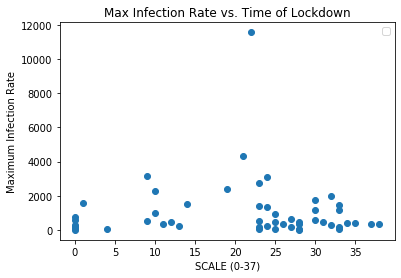

In [97]:
plot_lock_func(maxes_list)